# 폐기표본 샘플링 전략 (최적 멈춤 전략)

- JPark, ChatGPT 4o
- March 2025



### 폐기표본 수 결정의 수학적 근거

- 폐기표본의 수를 결정하는 근거는 **최적 정지 문제(Optimal Stopping Problem)**에 기반하며, 대표적인 경우로 **비서 문제(Secretary Problem)**의 수학적 분석을 이용할 수 있음

- 1. 비서 문제의 최적 전략
	•	$ N $명의 후보자가 순서대로 등장하고, 한 번 거른 후보자는 다시 선택할 수 없다고 가정.
	•	목표: 가능한 한 최고의 후보를 선택하는 확률을 극대화.
	•	수학적으로, 처음 $ \frac{N}{e} \approx 0.368N $ (약 37%)의 후보를 폐기하고 이후, 최초로 이보다 우수한 후보가 나타나면 선택하는 것이 최적 전략.

- 즉, 폐기표본의 수 = $ \lfloor N/e \rfloor $ (여기서 $e \approx 2.718$).

### 시뮬레이션 코드 설명

    1.	$ N $명의 후보를 무작위 점수(0~1 사이의 값)로 생성.
	2.	상위 37%의 후보를 단순 평가(폐기).
	3.	이후 이전까지 본 후보 중 최고값보다 높은 첫 번째 후보를 선택.
	4.	이 전략이 실제 최적 후보를 선택하는 확률을 계산.

### 결과 설명

	•	N명의 후보를 무작위로 생성하여 점수를 부여.
	•	처음 N/e (약 37%)의 후보를 단순히 평가 후 폐기.
	•	이후 처음으로 폐기한 후보보다 높은 점수를 가진 후보를 선택.
	•	최적의 후보(가장 높은 점수)와 비교하여 선택이 성공했는지 판단.
	•	여러 N 값에 대해 실험하여 성공 확률을 분석.

### 결과 해석
	•	최적 전략을 따를 경우, 최적 후보를 선택할 확률이 약 **1/e ≈ 36.8%**에 수렴.
	•	N이 커질수록 이 확률은 거의 일정하게 유지됨.


## 최적의 stop_threshold 구하기

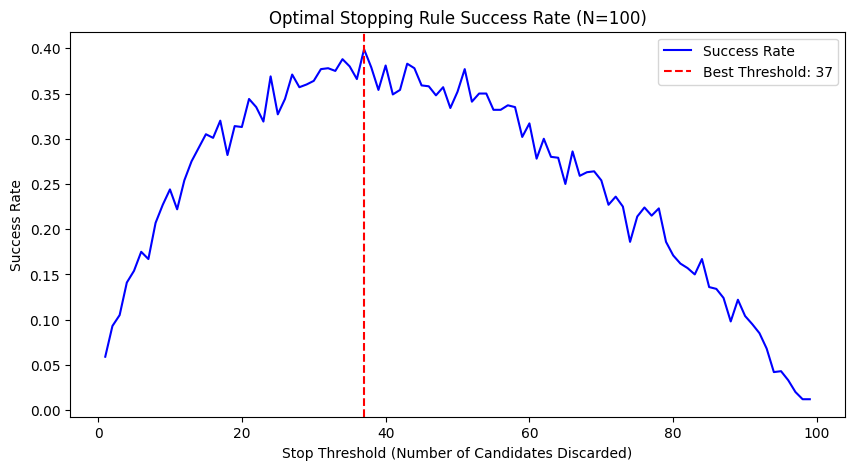

Optimal stop threshold: 37, Success rate: 0.3990


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def secretary_problem_simulation(N, stop_threshold, trials=1000):
    optimal_picks = 0
    
    for _ in range(trials):
        candidates = np.random.rand(N)  # 0~1 사이의 무작위 점수 부여
        best_in_discarded = max(candidates[:stop_threshold])  # 폐기된 후보 중 최고값
        
        # 폐기 이후 처음으로 최고값을 초과하는 후보를 선택
        for candidate in candidates[stop_threshold:]:
            if candidate > best_in_discarded:
                selected = candidate
                break
        else:
            selected = candidates[-1]  # 마지막까지 없으면 마지막 후보 선택
        
        # 최적 후보(가장 높은 값)와 선택한 후보 비교
        if selected == max(candidates):
            optimal_picks += 1
    
    return optimal_picks / trials  # 최적 후보를 선택한 확률 반환

# 다양한 stop_threshold 값에 대해 실험
N = 100  # 후보자 수
threshold_values = np.arange(1, N, 1)
success_rates = [secretary_problem_simulation(N, t) for t in threshold_values]

# 최적의 stop_threshold 찾기
best_threshold = threshold_values[np.argmax(success_rates)]

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(threshold_values, success_rates, label='Success Rate', color='b')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold}')
plt.xlabel('Stop Threshold (Number of Candidates Discarded)')
plt.ylabel('Success Rate')
plt.title(f'Optimal Stopping Rule Success Rate (N={N})')
plt.legend()
plt.show()

print(f"Optimal stop threshold: {best_threshold}, Success rate: {max(success_rates):.4f}")


stop_threshold =  1
stop_threshold =  1
stop_threshold =  1
stop_threshold =  2
stop_threshold =  2
stop_threshold =  2
stop_threshold =  3
stop_threshold =  3
stop_threshold =  4
stop_threshold =  4
stop_threshold =  4
stop_threshold =  5
stop_threshold =  5
stop_threshold =  5
stop_threshold =  6
stop_threshold =  6
stop_threshold =  6
stop_threshold =  7
stop_threshold =  7
stop_threshold =  8
stop_threshold =  8
stop_threshold =  8
stop_threshold =  9
stop_threshold =  9
stop_threshold =  9
stop_threshold =  10
stop_threshold =  10
stop_threshold =  11
stop_threshold =  11
stop_threshold =  11
stop_threshold =  12
stop_threshold =  12
stop_threshold =  12
stop_threshold =  13
stop_threshold =  13
stop_threshold =  13
stop_threshold =  14
stop_threshold =  14
stop_threshold =  15
stop_threshold =  15
stop_threshold =  15
stop_threshold =  16
stop_threshold =  16
stop_threshold =  16
stop_threshold =  17
stop_threshold =  17
stop_threshold =  18
stop_threshold =  18
stop_threshold = 

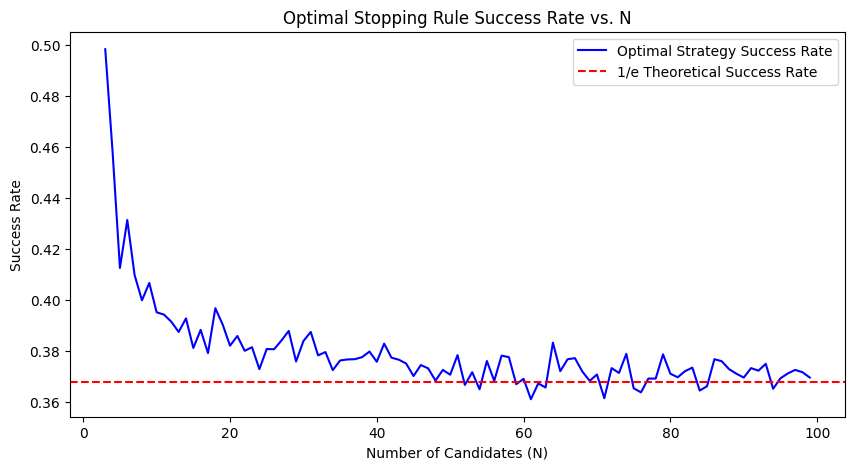

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def secretary_problem_simulation(N, trials=10000):
    optimal_picks = 0
    stop_threshold = int(N / np.e)  # 폐기표본 수 (약 37% 폐기)
    #print('stop_threshold = ', stop_threshold)
    
    for _ in range(trials):
        candidates = np.random.rand(N)  # N명의 사람에 대해서 0~1 사이의 무작위 점수 부여
        best_in_discarded = max(candidates[:stop_threshold])  # stop_threshold 범위에서 폐기된 후보 중 최고값
        
        # 폐기 이후 처음으로 최고값을 초과하는 후보를 선택
        for candidate in candidates[stop_threshold:]:
            if candidate > best_in_discarded:
                selected = candidate
                break
        else:
            selected = candidates[-1]  # 마지막까지 없으면 마지막 후보 선택
        
        # 최적 후보(가장 높은 값)와 선택한 후보 비교
        if selected == max(candidates):
            optimal_picks += 1
    
    return optimal_picks / trials  # 최적 후보를 선택한 확률 반환

# 다양한 N 값에 대해 실험
N_values = np.arange(3, 100, 1)
#print('N_values = ', N_values)
success_rates = [secretary_problem_simulation(N) for N in N_values]

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(N_values, success_rates, label='Optimal Strategy Success Rate', color='b')
plt.axhline(1/np.e, color='r', linestyle='--', label='1/e Theoretical Success Rate')
plt.xlabel('Number of Candidates (N)')
plt.ylabel('Success Rate')
plt.title('Optimal Stopping Rule Success Rate vs. N')
plt.legend()
plt.show()


### 왜 최적의 선택 확률이 $ \frac{1}{e} $ 에 수렴하는가?

비서 문제(Secretary Problem)의 최적 전략을 분석할 때, 37% (1/e) 비율의 후보를 폐기한 후 첫 번째로 더 나은 후보를 선택하면 최적 후보를 선택할 확률이 $ \frac{1}{e} $ 에 수렴하는 이유를 수학적으로 설명하겠습니다.

⸻

1. 문제 정의
	- $ N $ 명의 후보가 무작위 순서로 도착함.
	- 각 후보는 한 번만 평가할 수 있으며, 지나치면 다시 선택할 수 없음.
	- 목표: 최고의 후보를 선택할 확률을 최대화하는 최적의 전략 찾기.

⸻

2. 최적 전략: 폐기 후 첫 번째 우수한 후보 선택
	- 처음 $ rN $명의 후보를 폐기하고 그들의 최고 점수를 기억함.
	- 이후 이전까지의 최고점보다 높은 첫 번째 후보를 선택.

이때 $ r $을 적절히 선택하면 최적 후보를 선택할 확률을 극대화할 수 있음.

⸻

3. 수학적 분석

비서 문제는 순열 확률과 적분을 이용하여 분석할 수 있음.
	- $ N $명의 후보가 랜덤하게 정렬된다고 가정.
	- 특정 후보가 전체 중에서 __최고의 후보(랭크 1위)__ 가 될 확률을 계산.

(1) 최적 후보가 특정 위치 $ k $ 에 있을 확률

최적 후보(랭크 1위)가 $ k $번째 위치에 있을 확률:

$$ P(\text{최적 후보가 } k \text{번째에 등장}) = \frac{1}{N} $$

(모든 후보가 동일한 확률로 등장하므로)


(2) 우리가 최적 후보를 선택할 확률
	- 최적 후보가 폐기 구간을 벗어난 후 등장해야 함 $ (k > rN) $.
	- 최적 후보가 등장하기 전까지는 더 나은 후보가 없어야 함.
	- 즉, 랭크 1위 후보가 첫 번째로 선택될 수 있어야 함.

이 확률을 계산하면:
$$ P(\text{선택 성공}) = \sum_{k=rN}^{N} \frac{1}{N} \cdot P(\text{k번째 후보가 최고이며 이전 후보들보다 우수함}) $$

이제 __“이전 후보들보다 우수함”__ 이라는 조건의 확률을 계산하면:

$$ P(\text{k번째 후보가 이전 후보들보다 최고}) = \frac{rN}{k-1} $$

이를 확률 밀도 함수로 변환하고 적분하면:
$$ \int_{r}^{1} \frac{r}{x} dx = r \ln \left( \frac{1}{r} \right) $$

이 값을 최대화하는 r을 찾으면:
$$ r = \frac{1}{e} \approx 0.368 $$

즉, 최적의 폐기 비율은 $ \frac{1}{e} $ 이며, 이 경우 최적 후보를 선택할 확률도 $ \frac{1}{e} \approx 36.8\% $ 에 수렴함.

⸻

4. 결론
	- 처음 37%의 후보를 폐기한 후 처음으로 더 나은 후보를 선택하는 전략이 최적.
	- 최고의 후보를 선택할 확률은 약 $ \frac{1}{e} \approx 36.8\% $.
	- N이 증가할수록 이 확률은 $ \frac{1}{e} $ 에 수렴.

이것이 비서 문제에서 $ \frac{1}{e} $ 가 등장하는 이유입니다! 

## 상위의 m퍼센트의 우수한 인재를 선택하는 경우

- TODO
- 1997, Todd 
- https://horizon.kias.re.kr/6053/